In [1]:
#set the wd to file location
setwd(getSrcDirectory(function(){})[1])

# Exploratory Data Analysis 

This notebook is to be run 3rd.\
The purpose of this file is to perform initial exploration on the split of training data prior to vetting to suggest the next steps - wrangling, transformations, predictive methods;

In [2]:
#Import Necessary libraries
suppressWarnings({
library("dplyr")
library("tidyverse")
source('functions.R')})


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
##Read Data
data<- read.csv("./03a-vehicles-sample.csv", header = TRUE)

check the dimensions of the data frame

In [4]:
dim(data)

[1] 80096    14

In [5]:
colnames(data)

[1] "price"        "year"         "manufacturer" "condition"    "cylinders"   
 [6] "fuel"         "odometer"     "title_status" "transmission" "drive"       
[11] "size"         "type"         "paint_color"  "state"

### Convert all character data to factors

In [6]:
data<- data%>%
mutate_if(sapply(data, is.character), as.factor)

### Summary Statistics

In [7]:
summary(data)

     price             year         manufacturer       condition    
 Min.   :  1006   Min.   :2000   ford     :11891            :29881  
 1st Qu.:  7900   1st Qu.:2008   chevrolet: 8558   excellent:20892  
 Median : 15488   Median :2013   toyota   : 7760   fair     : 1003  
 Mean   : 18846   Mean   :2012   honda    : 4711   good     :23306  
 3rd Qu.: 26590   3rd Qu.:2017   nissan   : 4102   like new : 4668  
 Max.   :197999   Max.   :2022   bmw      : 3222   new      :  252  
                                 (Other)  :39852   salvage  :   94  
        cylinders           fuel          odometer          title_status  
             :30878           :  443   Min.   :     0             : 1089  
 6 cylinders :18804   diesel  : 4743   1st Qu.: 40162   clean     :76367  
 4 cylinders :17196   electric:  470   Median : 89000   lien      :  347  
 8 cylinders :12156   gas     :67678   Mean   : 93983   missing   :   24  
 5 cylinders :  382   hybrid  : 1370   3rd Qu.:136039   parts only:   11 

### Comments on numeric data:
 - ```year``` : values range from 2000 to 2022 depicting the year the posted vehicle was manufactured. A better variable for interpretation would be ```age```. The dataset was collected for posts made in year 2022 (over the period of 3 months). We can mutate the dataset to create ```age``` as follows $age = 2022 - year$.
  - ```odometer``` : values range from 0 to ~500,000 miles. Extreme values were excluded from the dataset (see 01-dataClean.ipynb), however looking at the summary odometer appears to be skewed to the right. Considering all values are positive, performing a square-root or cube-root transformation might be beneficial. 

### Comments on categorical data 
 - Binning : many attributes have similar categories that can be binned to produce better predictive power. attribute - ```condition```, ```fule```, ```cylinders```, ```transmission```, ```drive```, ```size```, ```type```, ```paint_color``` & ```title_status``` have significant amount of missing values, these may have their own predictive power. we expect a lower asking price if the poster has lesser information about the car. 
 

### Comments on Response Variable ```price```
 ```price``` gives us the posted ask price in USD for a given vehicle. From the summary statistics, we notice a significant interval in the prices between 3rd Qu. and max price. This indicates a right skewed data with many possible extreme points. We suggest trying a log transformation to account for this. 

In [8]:
var <- as.character(data$manufacturer)
head(var)
var[var==""] = "missing"

data$manufacturer<- var
head(data$manufacturer, 200)

[1] "gmc"       "chevrolet" "chevrolet" "ford"      "gmc"       "chevrolet"

[1] "gmc"           "chevrolet"     "chevrolet"     "ford"         
  [5] "gmc"           "chevrolet"     "toyota"        "chevrolet"    
  [9] "chevrolet"     "jeep"          "chevrolet"     "chevrolet"    
 [13] "toyota"        "chevrolet"     "toyota"        "ford"         
 [17] "nissan"        "ford"          "toyota"        "jeep"         
 [21] "ford"          "ram"           "mazda"         "ford"         
 [25] "cadillac"      "ford"          "jeep"          "ford"         
 [29] "gmc"           "honda"         "ram"           "gmc"          
 [33] "ram"           "ford"          "chevrolet"     "ford"         
 [37] "chevrolet"     "toyota"        "chevrolet"     "chevrolet"    
 [41] "toyota"        "jeep"          "dodge"         "honda"        
 [45] "honda"         "ford"          "honda"         "ford"         
 [49] "toyota"        "ford"          "lexus"         "jaguar"       
 [53] "buick"         "lexus"         "chrysler"      "volvo"        
 [57] "volvo"         "volvo"         "audi"          "infiniti"     
 [61] "lincoln"       "alfa-romeo"    "subaru"        "missing"      
 [65] "acura"         "audi"          "hyundai"       "gmc"          
 [69] "gmc"           "ford"          "jeep"          "jeep"         
 [73] "jeep"          "jeep"          "gmc"           "lincoln"      
 [77] "gmc"           "lincoln"       "lexus"         "lexus"        
 [81] "buick"         "jaguar"        "toyota"        "mercedes-benz"
 [85] "volvo"         "missing"       "volvo"         "volvo"        
 [89] "volvo"         "infiniti"      "alfa-romeo"    "lincoln"      
 [93] "hyundai"       "audi"          "missing"       "acura"        
 [97] "jeep"          "jeep"          "toyota"        "ram"          
[101] "jeep"          "jeep"          "jeep"          "bmw"          
[105] "chrysler"      "mitsubishi"    "gmc"           "gmc"          
[109] "lincoln"       "missing"       "lexus"         "buick"        
[113] "jaguar"        "subaru"        "acura"         "volvo"        
[117] "volvo"         "volvo"         "lincoln"       "alfa-romeo"   
[121] "infiniti"      "toyota"        "missing"       "bmw"          
[125] "volkswagen"    "ford"          "ford"          "honda"        
[129] "mazda"         "mazda"         "porsche"       "mazda"        
[133] "lexus"         "lexus"         "ford"          "ford"         
[137] "nissan"        "kia"           "dodge"         "ford"         
[141] "ford"          "toyota"        "nissan"        "toyota"       
[145] "buick"         "gmc"           "chevrolet"     "honda"        
[149] "toyota"        "bmw"           "kia"           "chevrolet"    
[153] "buick"         "toyota"        "hyundai"       "chevrolet"    
[157] "nissan"        "missing"       "gmc"           "ford"         
[161] "honda"         "chevrolet"     "chevrolet"     "chevrolet"    
[165] "ford"          "gmc"           "mercedes-benz" "ford"         
[169] "ford"          "jeep"          "missing"       "toyota"       
[173] "kia"           "nissan"        "chevrolet"     "kia"          
[177] "nissan"        "volkswagen"    "porsche"       "mercedes-benz"
[181] "chevrolet"     "ford"          "nissan"        "missing"      
[185] "bmw"           "honda"         "mazda"         "chevrolet"    
[189] "acura"         "nissan"        "kia"           "jeep"         
[193] "honda"         "buick"         "ford"          "ford"         
[197] "ram"           "gmc"           "ford"          "chevrolet"

In [9]:
var = sapply(data$manufacturer, function(i) country_of_orign(i))

In [10]:
head(var, 20)


gmc chevrolet chevrolet      ford       gmc chevrolet    toyota chevrolet 
    "USA"     "USA"     "USA"     "USA"     "USA"     "USA"   "Japan"     "USA" 
chevrolet      jeep chevrolet chevrolet    toyota chevrolet    toyota      ford 
    "USA"     "USA"     "USA"     "USA"   "Japan"     "USA"   "Japan"     "USA" 
   nissan      ford    toyota      jeep 
  "Japan"     "USA"   "Japan"     "USA"

In [24]:
new_data = data%>%
mutate(countryOrign = var)
colnames(new_data)
head(new_data)

[1] "price"        "year"         "manufacturer" "condition"    "cylinders"   
 [6] "fuel"         "odometer"     "title_status" "transmission" "drive"       
[11] "size"         "type"         "paint_color"  "state"        "fuels2"      
[16] "price_bins"   "countryOrign"

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,fuels2,price_bins,countryOrign
,<dbl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,33590,2014,gmc,good,8 cylinders,gas,57923,clean,other,,,pickup,white,al,gas,"(10,11]",USA
2,22590,2010,chevrolet,good,8 cylinders,gas,71229,clean,other,,,pickup,blue,al,gas,"(10,11]",USA
3,39590,2020,chevrolet,good,8 cylinders,gas,19160,clean,other,,,pickup,red,al,gas,"(10,11]",USA
4,15000,2013,ford,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black,al,gas,"(9,10]",USA
5,27990,2012,gmc,good,8 cylinders,gas,68696,clean,other,4wd,,pickup,black,al,gas,"(10,11]",USA
6,34590,2016,chevrolet,good,6 cylinders,gas,29499,clean,other,4wd,,pickup,silver,al,gas,"(10,11]",USA


In [12]:
head(country_origin_transform(data))

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,countryOrigin
,<dbl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,33590,2014,gmc,good,8 cylinders,gas,57923,clean,other,,,pickup,white,al,USA
2,22590,2010,chevrolet,good,8 cylinders,gas,71229,clean,other,,,pickup,blue,al,USA
3,39590,2020,chevrolet,good,8 cylinders,gas,19160,clean,other,,,pickup,red,al,USA
4,15000,2013,ford,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black,al,USA
5,27990,2012,gmc,good,8 cylinders,gas,68696,clean,other,4wd,,pickup,black,al,USA
6,34590,2016,chevrolet,good,6 cylinders,gas,29499,clean,other,4wd,,pickup,silver,al,USA


In [13]:
is_luxury_brands = sapply(data$manufacturer, function(i) is_luxury(i))

In [14]:
head(is_luxury_brands,200)

gmc     chevrolet     chevrolet          ford           gmc 
            0             0             0             0             0 
    chevrolet        toyota     chevrolet     chevrolet          jeep 
            0             0             0             0             0 
    chevrolet     chevrolet        toyota     chevrolet        toyota 
            0             0             0             0             0 
         ford        nissan          ford        toyota          jeep 
            0             0             0             0             0 
         ford           ram         mazda          ford      cadillac 
            0             0             0             0             0 
         ford          jeep          ford           gmc         honda 
            0             0             0             0             0 
          ram           gmc           ram          ford     chevrolet 
            0             0             0             0             0 
         ford     chevrolet        toyota     chevrolet     chevrolet 
            0             0             0             0             0 
       toyota          jeep         dodge         honda         honda 
            0             0             0             0             0 
         ford         honda          ford        toyota          ford 
            0             0             0             0             0 
        lexus        jaguar         buick         lexus      chrysler 
            1             1             0             1             0 
        volvo         volvo         volvo          audi      infiniti 
            1             1             1             1             1 
      lincoln    alfa-romeo        subaru       missing         acura 
            1             1             0             0             1 
         audi       hyundai           gmc           gmc          ford 
            1             0             0             0             0 
         jeep          jeep          jeep          jeep           gmc 
            0             0             0             0             0 
      lincoln           gmc       lincoln         lexus         lexus 
            1             0             1             1             1 
        buick        jaguar        toyota mercedes-benz         volvo 
            0             1             0             1             1 
      missing         volvo         volvo         volvo      infiniti 
            0             1             1             1             1 
   alfa-romeo       lincoln       hyundai          audi       missing 
            1             1             0             1             0 
        acura          jeep          jeep        toyota           ram 
            1             0             0             0             0 
         jeep          jeep          jeep           bmw      chrysler 
            0             0             0             1             0 
   mitsubishi           gmc           gmc       lincoln       missing 
            0             0             0             1             0 
        lexus         buick        jaguar        subaru         acura 
            1             0             1             0             1 
        volvo         volvo         volvo       lincoln    alfa-romeo 
            1             1             1             1             1 
     infiniti        toyota       missing           bmw    volkswagen 
            1             0             0             1             0 
         ford          ford         honda         mazda         mazda 
            0             0             0             0             0 
      porsche         mazda         lexus         lexus          ford 
            1             0             1             1             0 
         ford        nissan           kia         dodge          ford 
            0             0             0             0             0 
         ford        toyota       

In [15]:
head(country_origin_transform(data))

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,countryOrigin
,<dbl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,33590,2014,gmc,good,8 cylinders,gas,57923,clean,other,,,pickup,white,al,USA
2,22590,2010,chevrolet,good,8 cylinders,gas,71229,clean,other,,,pickup,blue,al,USA
3,39590,2020,chevrolet,good,8 cylinders,gas,19160,clean,other,,,pickup,red,al,USA
4,15000,2013,ford,excellent,6 cylinders,gas,128000,clean,automatic,rwd,full-size,truck,black,al,USA
5,27990,2012,gmc,good,8 cylinders,gas,68696,clean,other,4wd,,pickup,black,al,USA
6,34590,2016,chevrolet,good,6 cylinders,gas,29499,clean,other,4wd,,pickup,silver,al,USA


domestic,no_rows
<chr>,<int>
domestic,36593
foreign,40996
missing,2507


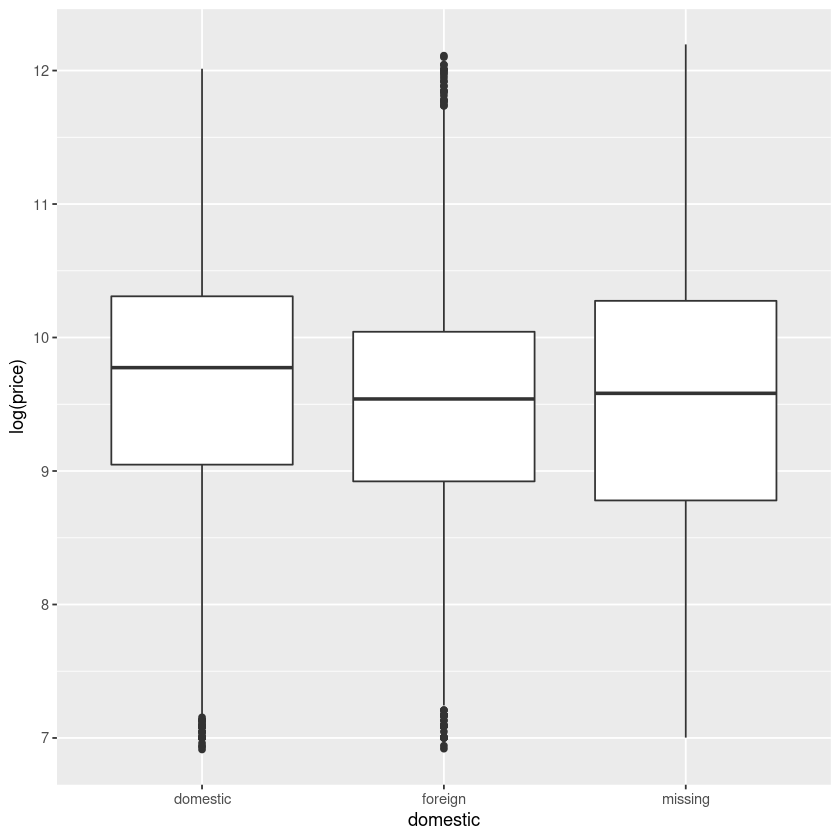

In [16]:
dom = sapply(new_data$countryOrign, function(i) is_domestic(i))
new_data = new_data %>% mutate(domestic = dom)
new_data %>% group_by(domestic) %>% summarise(no_rows = length(domestic))
ggplot(aes(x = domestic, y = log(price)), data = new_data)+geom_boxplot()

luxury,no_rows
<dbl>,<int>
0,64697
1,15399


Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


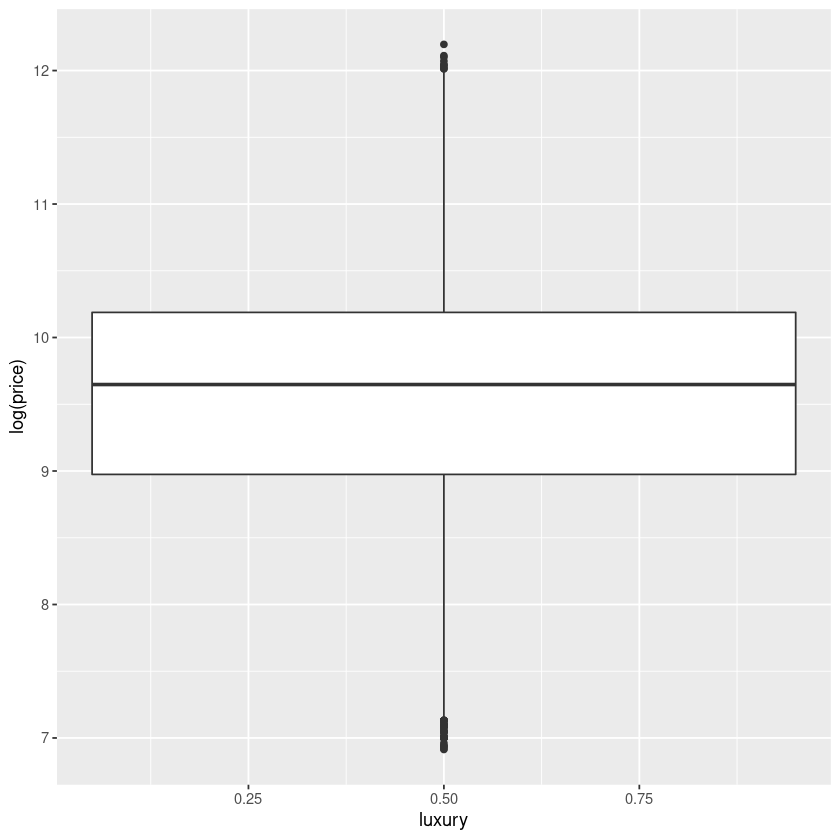

In [26]:
lux = sapply(new_data$manufacturer, function(i) is_luxury(i))
new_data = new_data %>% mutate(luxury = lux)
new_data %>% group_by(luxury) %>% summarise(no_rows = length(luxury))
ggplot(aes(x = luxury, y = log(price)), data = new_data)+geom_boxplot()
# TODO: make this plot work 

## Fuel analysis
### is electric significantly different from hybrid; can we combine them?
electric has a higher mean and higher quartiles than hybrid but there are only 470 electric 
~400 are unlisted and ~5000 are "other", they seem fairly different. 
electric/hybrid: combine into "hybrid and electric" OR remove electric 
NA/other: combine into "unlisted and Other" OR remove NA

fuel,no_rows
<fct>,<int>
,443
diesel,4743
electric,470
gas,67678
hybrid,1370
other,5392


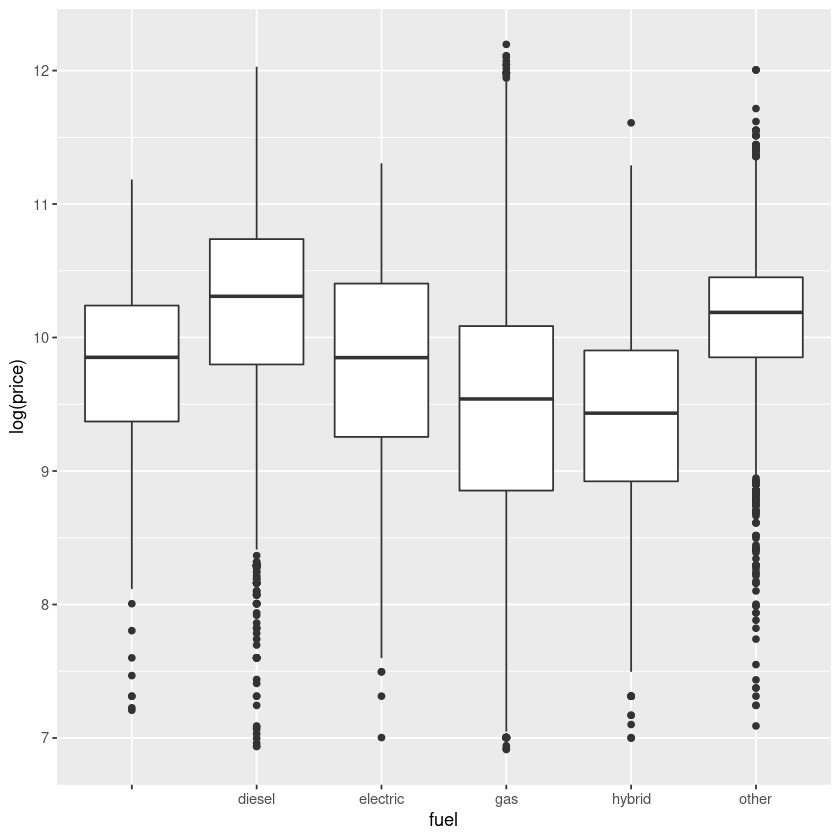

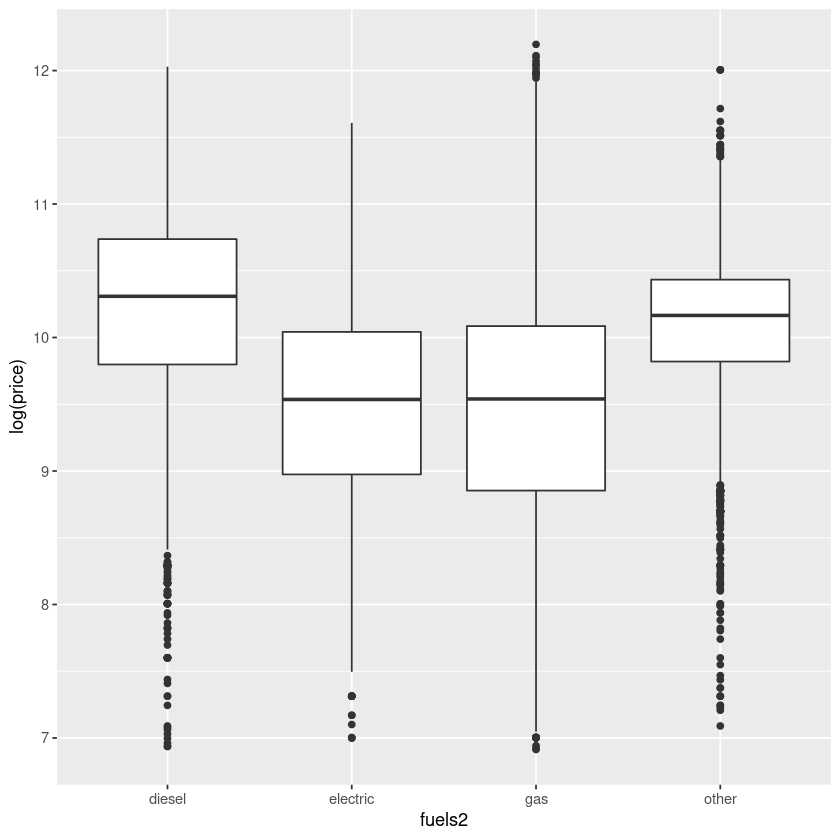

In [17]:
data %>% group_by(fuel) %>% summarise(no_rows = length(fuel))

# fuel_sub = data %>% filter(fuel == "diesel" | fuel == "gas" | fuel == "hybrid")
ggplot(aes(x = fuel, y = log(price)), data = data)+geom_boxplot()
# ggplot(aes(x = fuel, y = log(price)), data = fuel_sub)+geom_boxplot()


fuels=data$fuel
fuels[fuels=="hybrid"]="electric";fuels[fuels==""]="other"
data$fuels2=factor(fuels)
ggplot(aes(x = fuels2, y = log(price)), data = data)+geom_boxplot() 
# data %>% group_by(fuels2) %>% summarise(no_rows = length(fuels2))

### Numerical data Histograms

In [ ]:
ggplot(data, aes(x = odometer))+
geom_histogram()+
xlab("Odometer Reading in miles")+
ylab("frequency")+
title("Histogram of the Odometer Reading (in miles)")

In [18]:
install.packages("GoodmanKruskal")

Installing package into ‘/home/daniel/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [27]:
library(GoodmanKruskal)
# bin the response variable
data <- data %>% mutate(price_bins = cut(log(price), breaks = c(7,8,9,10,11,12)))
# head(cleanedVehicles, 10)
data%>%group_by(price_bins)%>%count() # excludes 21 rows

## TODO: put these into a dataframe
# GKtau(trainVehicles$type, trainVehicles$fuel)
# GKtau(trainVehicles$type, trainVehicles$manufacturer)
# GKtau(trainVehicles$type, trainVehicles$price_bins)
# GKtau(trainVehicles$manufacturer, trainVehicles$price_bins)
# GKtau(trainVehicles$condition, trainVehicles$price_bins)
# GKtau(trainVehicles$fuel, trainVehicles$price_bins)

# GKtau(data$fuel, data$price_bins)         # 2.7%
# GKtau(data$fuels2, data$price_bins)

# GKtau(data$manufacturer, data$price_bins) # 5.2
# GKtau(data$type, data$price_bins)            # 5.7
# GKtau(data$condition, data$price_bins)     # 2.9 
# GKtau(data$cylinders, data$price_bins)       # 3.3
# GKtau(data$transmission, data$price_bins)    # 5
# GKtau(data$drive, data$price_bins)          # 3.5
# GKtau(data$paint_color, data$price_bins)     # 1.2
# GKtau(data$state, data$price_bins)          # 0.9

# # sqrt(GKtau(data$manufacturer, data$price_bins)$tauxy) # 5.2    23
# # sqrt(GKtau(data$type, data$price_bins)$tauxy)            # 5.7    24
# # sqrt(GKtau(data$condition, data$price_bins)$tauxy)     # 2.9       17
# # sqrt(GKtau(data$cylinders, data$price_bins)$tauxy)       # 3.3     18
# # sqrt(GKtau(data$transmission, data$price_bins)$tauxy)    # 5         22
# # sqrt(GKtau(data$drive, data$price_bins)$tauxy)          # 3.5       19
# # sqrt(GKtau(data$paint_color, data$price_bins)$tauxy)     # 1.2      11
# # sqrt(GKtau(data$state, data$price_bins)$tauxy)          # 0.9      9

# new_data <- new_data %>% mutate(price_bins = cut(log(price), breaks = c(7,8,9,10,11,12)))
# GKtau(new_data$countryOrign, new_data$price_bins)
# sqrt(GKtau(new_data$countryOrign, new_data$price_bins)$tauxy)  # 13   country has fairly weak predictive power on price
# GKtau(new_data$domestic, new_data$price_bins)
# sqrt(GKtau(new_data$domestic, new_data$price_bins)$tauxy)


subset = new_data %>% select(type, condition, cylinders, transmission, countryOrign, luxury, price_bins)
GKtauDataframe(subset, includeNA = "no")

price_bins,n
<fct>,<int>
"(7,8]",2916
"(8,9]",18673
"(9,10]",32167
"(10,11]",25038
"(11,12]",1282
NA,20


               type condition cylinders transmission countryOrign luxury
type         14.000     0.058     0.115        0.116        0.075  0.083
condition     0.019     7.000     0.051        0.222        0.003  0.011
cylinders     0.053     0.048     9.000        0.033        0.062  0.020
transmission  0.018     0.134     0.025        4.000        0.003  0.017
countryOrign  0.026     0.005     0.034        0.012        8.000  0.510
luxury        0.010     0.005     0.006        0.010        0.111  2.000
price_bins    0.019     0.022     0.025        0.080        0.016  0.015
             price_bins
type              0.057
condition         0.029
cylinders         0.033
transmission      0.050
countryOrign      0.017
luxury            0.006
price_bins        5.000
attr(,"class")
[1] "GKtauMatrix"

## Goodman Kruskal Tau notes and observations:
"a good feature for predicting a nominal response variable has sqrt(GKtau) in the 0.2 to 0.3 range." https://uglab.stat.ubc.ca/~h.joe/stat447-2023/2023-03-30-classnotes.html

manufacturer decently predicts type, cylinders, transmission, and price

type decently predicts condition, CYLINDERS, TRANSMISSION, country, and price

condition decently predicts cylinders, transmission

cylinders decently predicts type, condition, country 

transmission decently predicts CONDITION, price

country decently predicts manufacturer but nothing else

price decently predicts transmission